In [1]:
# FIP CSV Data Analysis - Jupyter Notebook Version
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime
import json

Find FIB Folder and CSV Files

In [2]:
# Automatically find the 'fib' folder within /data directory
data_base = "/data"
fib_folder = None
results_path = "/results"

# Search for 'fib' folder
for root, dirs, files in os.walk(data_base):
    if 'fib' in dirs:
        fib_folder = os.path.join(root, 'fib')
        break

if fib_folder is None:
    print("❌ No 'fib' folder found in /data directory")
    # List what's available
    print("Available directories in /data:")
    for item in os.listdir(data_base):
        if os.path.isdir(os.path.join(data_base, item)):
            print(f"  📁 {item}")
else:
    print(f"✅ Found fib folder: {fib_folder}")
    
    # Find all CSV files in the fib folder
    csv_files = glob.glob(os.path.join(fib_folder, "*.csv"))
    print(f"📊 Found {len(csv_files)} CSV files:")
    for csv_file in csv_files:
        print(f"  📄 {os.path.basename(csv_file)}")

✅ Found fib folder: /data/FIP_655834_2023-05-03_13-54-46/fib
📊 Found 6 CSV files:
  📄 FIP_DataG_2023-05-03T13_54_46.csv
  📄 FIP_DataIso_2023-05-03T13_54_46.csv
  📄 FIP_DataR_2023-05-03T13_54_46.csv
  📄 FaceBottomCamera2023-05-03T13_54_46.csv
  📄 FaceSideCamera2023-05-03T13_54_46.csv
  📄 TTL_TS2023-05-03T13_54_46.csv


Find FIB Folder and CSV Files

In [3]:
# Load all CSV files into a dictionary
data_dict = {}

if fib_folder and csv_files:
    for csv_file in csv_files:
        file_name = os.path.basename(csv_file)
        print(f"Loading: {file_name}")
        
        try:
            df = pd.read_csv(csv_file)
            data_dict[file_name] = df
            print(f"  ✅ Shape: {df.shape}, Columns: {list(df.columns)[:3]}...")
            
        except Exception as e:
            print(f"  ❌ Error loading {file_name}: {str(e)}")
    
    print(f"🎉 Successfully loaded {len(data_dict)} CSV files")
else:
    print("❌ No CSV files to load")

Loading: FIP_DataG_2023-05-03T13_54_46.csv
  ✅ Shape: (128519, 4), Columns: ['50095318.0032', '390.272', '385.090909090909']...
Loading: FIP_DataIso_2023-05-03T13_54_46.csv
  ✅ Shape: (128519, 7), Columns: ['50095333.3632', '383.230769230769', '394.074074074074']...
Loading: FIP_DataR_2023-05-03T13_54_46.csv
  ✅ Shape: (128519, 4), Columns: ['50095352.3584', '1024', '1024.1']...
Loading: FaceBottomCamera2023-05-03T13_54_46.csv
  ✅ Shape: (213038, 1), Columns: ['50087147.136']...
Loading: FaceSideCamera2023-05-03T13_54_46.csv
  ✅ Shape: (319015, 1), Columns: ['50087149.5296']...
Loading: TTL_TS2023-05-03T13_54_46.csv
  ✅ Shape: (6436, 1), Columns: ['50087836.9792']...
🎉 Successfully loaded 6 CSV files


Data Overview and Summary Statistics

In [4]:
# Display basic information about each CSV file
print("📋 Dataset Overview:")
print("=" * 60)

analysis_results = {}

for file_name, df in data_dict.items():
    print(f"📄 {file_name}")
    print(f"   Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(f"   Numeric columns: {list(numeric_cols)}")
    
    if len(numeric_cols) > 0:
        # Basic statistics for the main signal (usually second numeric column)
        if len(numeric_cols) > 1:
            signal_col = numeric_cols[1]  # Skip time/index column
        else:
            signal_col = numeric_cols[0]
            
        signal_data = df[signal_col].dropna()
        
        # Calculate FIP-specific metrics
        baseline = np.percentile(signal_data, 10)  # Bottom 10% as baseline
        peak_thresh = np.percentile(signal_data, 95)  # Top 5% as peaks
        
        print(f"   Signal column: {signal_col}")
        print(f"   Range: [{signal_data.min():.3f}, {signal_data.max():.3f}]")
        print(f"   Mean ± STD: {signal_data.mean():.3f} ± {signal_data.std():.3f}")
        print(f"   Baseline estimate: {baseline:.3f}")
        print(f"   Peak threshold: {peak_thresh:.3f}")
        
        # Store analysis results
        analysis_results[file_name] = {
            'shape': df.shape,
            'signal_column': signal_col,
            'mean': signal_data.mean(),
            'std': signal_data.std(),
            'baseline': baseline,
            'peak_threshold': peak_thresh,
            'data_length': len(signal_data)
        }

print(f"📊 Analysis complete for {len(analysis_results)} files")

📋 Dataset Overview:
📄 FIP_DataG_2023-05-03T13_54_46.csv
   Shape: 128519 rows × 4 columns
   Numeric columns: ['50095318.0032', '390.272', '385.090909090909', '384.276816608997']
   Signal column: 390.272
   Range: [349.184, 4214.400]
   Mean ± STD: 3915.624 ± 62.265
   Baseline estimate: 3853.312
   Peak threshold: 4009.344
📄 FIP_DataIso_2023-05-03T13_54_46.csv
   Shape: 128519 rows × 7 columns
   Numeric columns: ['50095333.3632', '383.230769230769', '394.074074074074', '380.093023255814', '0', '0.1', '0.2']
   Signal column: 383.230769230769
   Range: [357.538, 1215.538]
   Mean ± STD: 1121.432 ± 23.475
   Baseline estimate: 1092.923
   Peak threshold: 1157.846
📄 FIP_DataR_2023-05-03T13_54_46.csv
   Shape: 128519 rows × 4 columns
   Numeric columns: ['50095352.3584', '1024', '1024.1', '1024.2']
   Signal column: 1024
   Range: [1024.000, 2562.977]
   Mean ± STD: 2319.184 ± 36.279
   Baseline estimate: 2287.116
   Peak threshold: 2392.279
📄 FaceBottomCamera2023-05-03T13_54_46.csv
   

Overview Visualizations - All Files Together

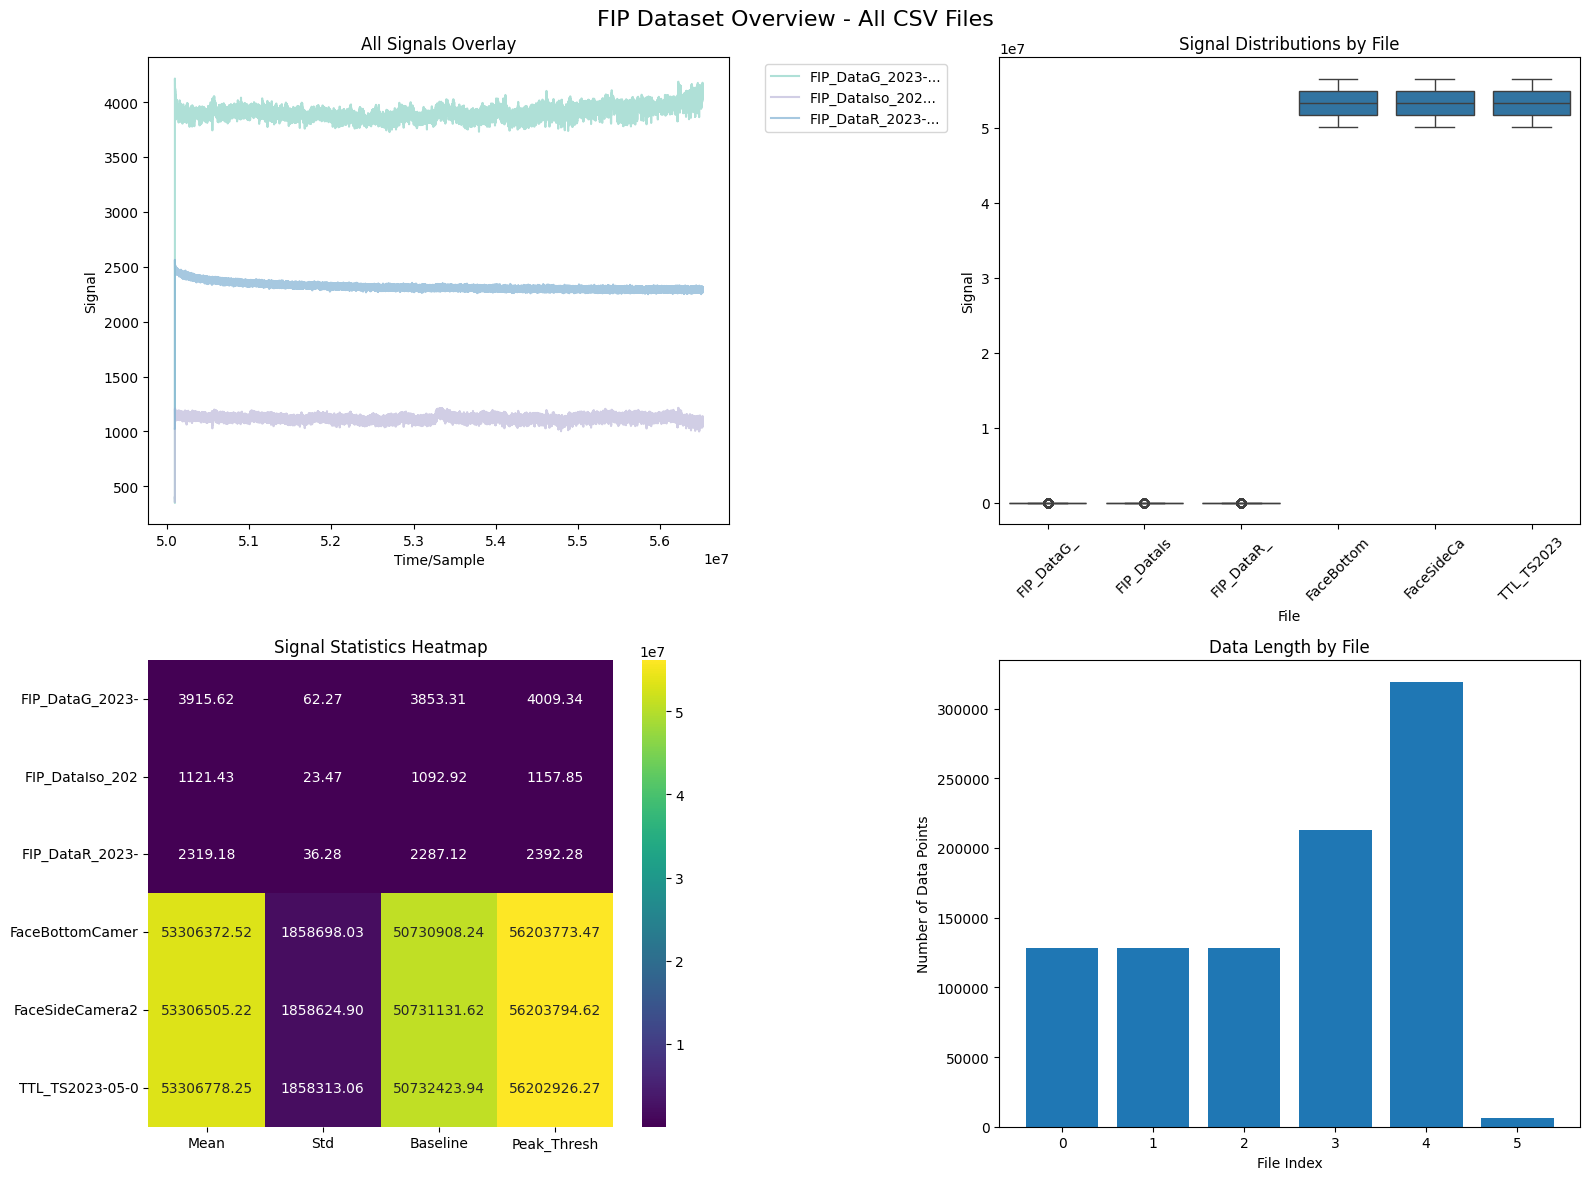

In [5]:
# Create overview plots comparing all CSV files
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('FIP Dataset Overview - All CSV Files', fontsize=16)

# Generate colors for each file
colors = plt.cm.Set3(np.linspace(0, 1, len(data_dict)))

# Plot 1: All signals overlaid
for i, (file_name, df) in enumerate(data_dict.items()):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) >= 2:
        axes[0,0].plot(df.iloc[:, 0], df.iloc[:, 1], 
                      alpha=0.7, color=colors[i], 
                      label=file_name[:15] + ('...' if len(file_name) > 15 else ''))

axes[0,0].set_title('All Signals Overlay')
axes[0,0].set_xlabel('Time/Sample')
axes[0,0].set_ylabel('Signal')
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Signal distributions (box plot)
all_signals = []
file_labels = []

for file_name, df in data_dict.items():
    if file_name in analysis_results:
        signal_col = analysis_results[file_name]['signal_column']
        signal_data = df[signal_col].dropna()
        # Sample data if too large (for plotting performance)
        if len(signal_data) > 10000:
            signal_data = signal_data.sample(n=10000)
        all_signals.extend(signal_data.values)
        file_labels.extend([file_name[:10]] * len(signal_data))

if all_signals:
    signal_df = pd.DataFrame({'Signal': all_signals, 'File': file_labels})
    sns.boxplot(data=signal_df, x='File', y='Signal', ax=axes[0,1])
    axes[0,1].set_title('Signal Distributions by File')
    axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Statistics comparison heatmap
if analysis_results:
    stats_data = []
    file_names = []
    
    for file_name, analysis in analysis_results.items():
        stats_data.append([
            analysis['mean'],
            analysis['std'], 
            analysis['baseline'],
            analysis['peak_threshold']
        ])
        file_names.append(file_name[:15])
    
    stats_df = pd.DataFrame(stats_data, 
                           columns=['Mean', 'Std', 'Baseline', 'Peak_Thresh'],
                           index=file_names)
    sns.heatmap(stats_df, annot=True, fmt='.2f', ax=axes[1,0], cmap='viridis')
    axes[1,0].set_title('Signal Statistics Heatmap')

# Plot 4: File sizes comparison
if analysis_results:
    files = list(analysis_results.keys())
    sizes = [analysis_results[f]['data_length'] for f in files]
    
    axes[1,1].bar(range(len(files)), sizes)
    axes[1,1].set_title('Data Length by File')
    axes[1,1].set_xlabel('File Index')
    axes[1,1].set_ylabel('Number of Data Points')

plt.tight_layout()
plt.savefig(f'{results_path}/fip_overview_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

🔍 Detailed analysis of: FIP_DataIso_2023-05-03T13_54_46.csv


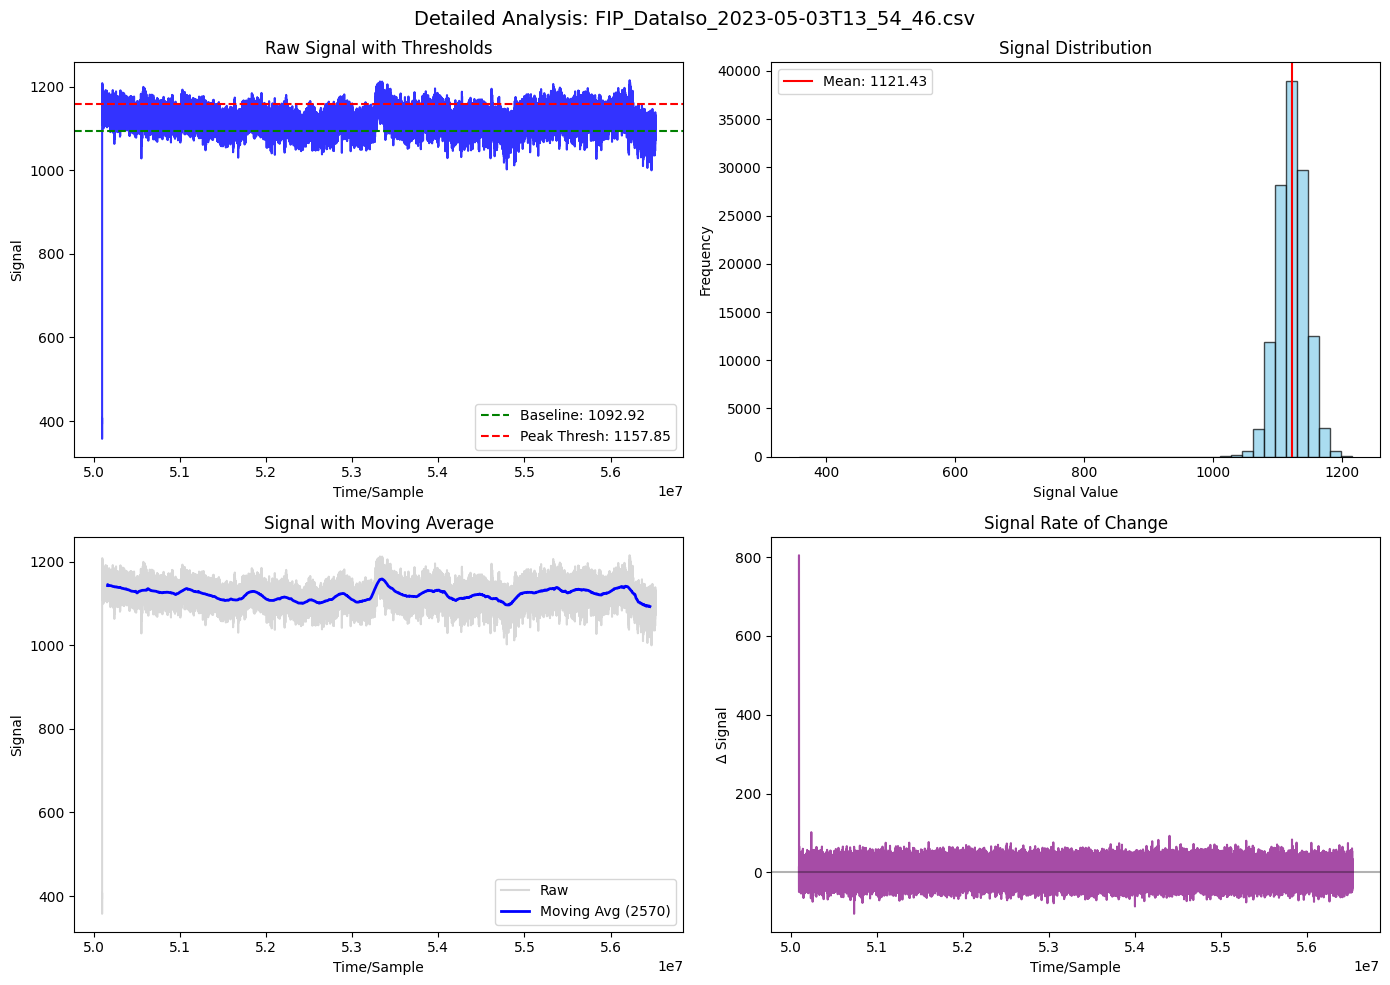

In [6]:
# Select first file for detailed analysis (you can change this)
if data_dict:
    selected_file = list(data_dict.keys())[1]
    df = data_dict[selected_file]
    
    print(f"🔍 Detailed analysis of: {selected_file}")
    
    # Create detailed plots for selected file
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Detailed Analysis: {selected_file}', fontsize=14)
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) >= 2:
        time_col = df.iloc[:, 0]
        signal_col = df.iloc[:, 1]
        analysis = analysis_results[selected_file]
        
        # Raw signal with baseline and threshold lines
        axes[0,0].plot(time_col, signal_col, color='blue', alpha=0.8)
        axes[0,0].axhline(y=analysis['baseline'], color='green', 
                         linestyle='--', label=f"Baseline: {analysis['baseline']:.2f}")
        axes[0,0].axhline(y=analysis['peak_threshold'], color='red', 
                         linestyle='--', label=f"Peak Thresh: {analysis['peak_threshold']:.2f}")
        axes[0,0].set_title('Raw Signal with Thresholds')
        axes[0,0].set_xlabel('Time/Sample')
        axes[0,0].set_ylabel('Signal')
        axes[0,0].legend()
        
        # Signal histogram
        axes[0,1].hist(signal_col.dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,1].axvline(x=analysis['mean'], color='red', linestyle='-', 
                         label=f"Mean: {analysis['mean']:.2f}")
        axes[0,1].set_title('Signal Distribution')
        axes[0,1].set_xlabel('Signal Value')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].legend()
        
        # Moving average (if enough data points)
        if len(signal_col) > 100:
            window = max(len(signal_col) // 50, 10)
            moving_avg = signal_col.rolling(window=window, center=True).mean()
            
            axes[1,0].plot(time_col, signal_col, alpha=0.3, color='gray', label='Raw')
            axes[1,0].plot(time_col, moving_avg, color='blue', linewidth=2, label=f'Moving Avg ({window})')
            axes[1,0].set_title('Signal with Moving Average')
            axes[1,0].set_xlabel('Time/Sample')
            axes[1,0].set_ylabel('Signal')
            axes[1,0].legend()
        
        # Signal changes (derivative)
        signal_diff = np.diff(signal_col.dropna())
        axes[1,1].plot(time_col[1:], signal_diff, color='purple', alpha=0.7)
        axes[1,1].set_title('Signal Rate of Change')
        axes[1,1].set_xlabel('Time/Sample')
        axes[1,1].set_ylabel('Δ Signal')
        axes[1,1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{results_path}/detailed_{selected_file.replace(".csv", "")}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

In [7]:
# Create processed versions of each CSV file and save results
print("💾 Processing and saving data...")

for file_name, df in data_dict.items():
    if file_name in analysis_results:
        analysis = analysis_results[file_name]
        signal_col = analysis['signal_column']
        
        # Create processed version with additional columns
        processed_df = df.copy()
        
        # Add z-score normalization
        processed_df[f'{signal_col}_zscore'] = (df[signal_col] - analysis['mean']) / analysis['std']
        
        # Add baseline-subtracted signal
        processed_df[f'{signal_col}_baseline_subtracted'] = df[signal_col] - analysis['baseline']
        
        # Add peak detection (simple threshold-based)
        processed_df[f'{signal_col}_is_peak'] = df[signal_col] > analysis['peak_threshold']
        
        # Save processed CSV
        safe_filename = file_name.replace('.csv', '').replace(' ', '_')
        processed_df.to_csv(f'{results_path}/processed_{safe_filename}.csv', index=False)
        print(f"  ✅ Saved: processed_{safe_filename}.csv")

# Save comprehensive analysis summary
summary = {
    'experiment_info': {
        'fib_folder_path': fib_folder,
        'total_csv_files': len(data_dict),
        'analysis_timestamp': datetime.now().isoformat()
    },
    'files_analyzed': list(data_dict.keys()),
    'analysis_results': {k: {
        'shape': v['shape'],
        'signal_stats': {
            'mean': float(v['mean']),
            'std': float(v['std']),
            'baseline': float(v['baseline']),
            'peak_threshold': float(v['peak_threshold'])
        }
    } for k, v in analysis_results.items()}
}

with open(f'{results_path}/fip_analysis_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print(f"🎉 Analysis Complete!")
print(f"📁 Results saved to: {results_path}")
print(f"📊 Files generated:")
print(f"  - fip_overview_analysis.png (overview plots)")
print(f"  - detailed_*.png (individual file analysis)")
print(f"  - processed_*.csv (enhanced CSV files)")
print(f"  - fip_analysis_summary.json (analysis metadata)")
print(f"\n✨ Ready for further analysis!")

💾 Processing and saving data...
  ✅ Saved: processed_FIP_DataG_2023-05-03T13_54_46.csv
  ✅ Saved: processed_FIP_DataIso_2023-05-03T13_54_46.csv
  ✅ Saved: processed_FIP_DataR_2023-05-03T13_54_46.csv
  ✅ Saved: processed_FaceBottomCamera2023-05-03T13_54_46.csv
  ✅ Saved: processed_FaceSideCamera2023-05-03T13_54_46.csv
  ✅ Saved: processed_TTL_TS2023-05-03T13_54_46.csv
🎉 Analysis Complete!
📁 Results saved to: /results
📊 Files generated:
  - fip_overview_analysis.png (overview plots)
  - detailed_*.png (individual file analysis)
  - processed_*.csv (enhanced CSV files)
  - fip_analysis_summary.json (analysis metadata)

✨ Ready for further analysis!
